In [1]:
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib as plt
import scipy
import Advanced_Features
%matplotlib inline

In [2]:
Reg_Season_Rating = pd.read_csv("basketball_csvs/Regular_Season_Team_Rating.csv")
Champions = pd.read_csv("basketball_csvs/Champions.csv")
Playoff_elim = pd.read_csv("basketball_csvs/playoff_elim.csv")
per100_stats = pd.read_csv("basketball_csvs/per_poss_all.csv")
All_stats = pd.read_csv("basketball_csvs/per_game_all.csv")

In [3]:
All_stats['Assist_Ratio'] = All_stats[['AST_game','FGA_game','FTA_game','TOV_game']].apply(Advanced_Features.assist_ratio,axis=1)

In [4]:
All_stats['Pythagorean_Winning_Percentage'] = All_stats[['PTS_game','PTS_opp_game']].apply(Advanced_Features.Pythagorean_Winning_Percentage,axis=1)

In [5]:
All_stats['Efficiency_Differential']=Reg_Season_Rating[['ORtg','DRtg']].apply(Advanced_Features.Efficiency_Differential,axis=1)

In [6]:
All_stats['Defensive_Rebounding_Percentage'] = All_stats[['DRB_game','ORB_opp_game']].apply(Advanced_Features.Defensive_Rebouding_Percentage,axis=1)


In [7]:
All_stats['Possessions_game'] = All_stats[['FGA_game','TOV_game','FTA_game','ORB_game']].apply(Advanced_Features.possessions,axis=1)

In [8]:
All_stats['Possessions_opp_game'] = All_stats[['FGA_opp_game','TOV_opp_game','FTA_opp_game','ORB_opp_game']].apply(Advanced_Features.possessions,axis=1)

In [9]:
All_stats['Offensive_Rebounding_Percentage'] = All_stats[['ORB_game','DRB_opp_game']].apply(Advanced_Features.Offensive_Rebounding_Percentage,axis=1)

In [10]:
All_stats['Pace'] = All_stats[['MP_game','Possessions_game','Possessions_opp_game']].apply(Advanced_Features.pace,axis=1)

In [11]:
All_stats['Play_Percentage'] = All_stats[['FG_game','FGA_game','ORB_game','TOV_game']].apply(Advanced_Features.play_percentage,axis=1)

In [12]:
All_stats['Turnover_Ratio'] = All_stats[['TOV_game','FGA_game','FTA_game','AST_game','TOV_game']].apply(Advanced_Features.Turnover_Ratio,axis=1)

In [13]:
Advanced_features = All_stats[['Year','Team_game','Assist_Ratio',
                              'Pythagorean_Winning_Percentage','Efficiency_Differential',
                              'Defensive_Rebounding_Percentage','Possessions_game','Possessions_opp_game',
                              'Offensive_Rebounding_Percentage','Pace','Play_Percentage','Turnover_Ratio']]

In [14]:
def asterisk (name):
    if "*" in name:
        return name[:(len(name)-1)]
    else:
        return name

In [15]:
Pace_Average = DataFrame()
for i in range (1986,2018):
    temp_df = Advanced_features[['Pace','Year']][Advanced_features['Year'] == i]
    temp_df['Pace_Average'] = temp_df.Pace.mean()
    Pace_Average = Pace_Average.append(temp_df)

In [16]:
Advanced_features = pd.concat([Advanced_features,Pace_Average['Pace_Average']],axis=1)
Advanced_features['Team_game'] = Advanced_features['Team_game'].apply(asterisk)

In [17]:
Advanced_features.rename (columns={"Team_game":"Team"},inplace=True)

In [18]:
Unadjusted_Reg_Season_Rating = Reg_Season_Rating.drop(columns = ['Conf','Div','W','L','MOV/A','ORtg/A','DRtg/A','NRtg/A'])
Adjusted_Reg_Season_Rating=Reg_Season_Rating.drop(columns = ['Conf','Div','W','L','MOV','ORtg','DRtg','NRtg'])

In [19]:
Advanced_features = pd.merge(Advanced_features,Adjusted_Reg_Season_Rating, on=['Team','Year']).head()

In [20]:
Advanced_features['Pace_Differential'] = Advanced_features['Pace']-Advanced_features['Pace_Average']

In [21]:
Advanced_features['Possessions_Differential'] = Advanced_features['Possessions_game']-Advanced_features['Possessions_opp_game']

In [22]:
Playoff_elim.Year=Playoff_elim.Year.astype(int)
Playoff_elim.head()
Playoff_elim.rename(columns={'Teams':'Team'},inplace=True)

In [23]:
Unadjusted_Reg_Season_Rating = pd.merge(Unadjusted_Reg_Season_Rating,Playoff_elim, on=['Team','Year']).head()

In [24]:
Advanced_features.head()

,Year,Team,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,...,Turnover_Ratio,Pace_Average,Rank,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,Pace_Differential,Possessions_Differential
0,1986,Atlanta Hawks,17.270312,0.591152,9.24,0.665909,98.99520,99.13344,0.348624,98.449014,...,12.655573,100.77809,4,0.610,2.59,108.76,106.19,2.57,-2.329076,-0.13824
1,1986,Boston Celtics,19.801845,0.805120,8.96,0.716418,100.75776,100.62336,0.313107,99.817160,...,11.295898,100.77809,1,0.817,9.06,112.54,103.67,8.87,-0.960930,0.13440
2,1986,Chicago Bulls,17.070792,0.362645,7.31,0.673123,99.28320,99.24480,0.351351,98.402974,...,12.193423,100.77809,20,0.366,-3.12,109.95,113.06,-3.11,-2.375116,0.03840
3,1986,Cleveland Cavaliers,17.598257,0.395775,2.37,0.684211,100.60416,101.26464,0.302752,100.432239,...,12.011509,100.77809,16,0.354,-2.19,106.37,108.53,-2.17,-0.345851,-0.66048
4,1986,Dallas Mavericks,17.838798,0.539461,2.20,0.667411,101.24928,101.28000,0.300000,100.635667,...,10.897632,100.77809,8,0.537,0.70,112.45,111.59,0.86,-0.142423,-0.03072


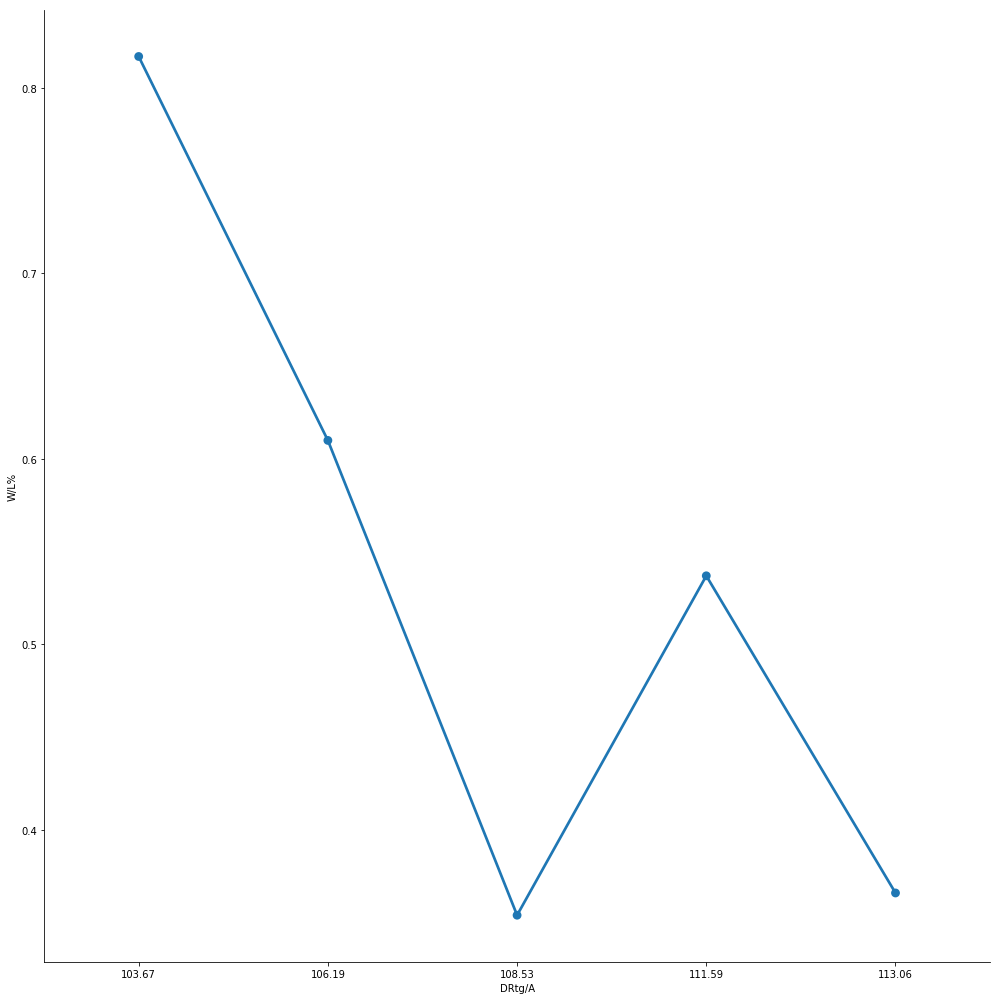

In [34]:
sns.factorplot(x='DRtg/A',y='W/L%',data=Advanced_features,size=14)